<a href="https://colab.research.google.com/github/trevorwjames/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment_Trevor_James.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Created the vector to work with   
sales = np.array([[3505, 2400, 3027, 2798, 3700, 3250, 2689]])

In [23]:
# Mean of the vector data set
mean = (3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689) / 7

mean

3052.714285714286

In [18]:
# creating a dsitance from the mean data set
salesdis = sales-mean

salesdis

array([[ 452.28571429, -652.71428571,  -25.71428571, -254.71428571,
         647.28571429,  197.28571429, -363.71428571]])

In [17]:
# Squared distanced from the mean
sales_dis_sqr = salesdis**2

sales_dis_sqr

array([[204562.36734694, 426035.93877551,    661.2244898 ,
         64879.36734694, 418978.79591837,  38921.65306122,
        132288.08163265]])

In [16]:
# Sum of the squared distances from the mean 
sales_dis_sqr_sum = sales_dis_sqr.sum()

sales_dis_sqr_sum

1286327.4285714284

In [57]:
# Divdingt the squared distances from the mean by the sample DOF, Here we have the variance of the sales data set
variance = sales_dis_sqr_sum / 6

variance

214387.90476190473

In [20]:
# taking the square root of the above variance gives us the Standard Deviation
stddev = np.sqrt(variance)

stddev

463.0204150595357

In [58]:
# checking my work of the sales variance with Pandas, DDOF = 1 for sample size 
salesvar = sales.var(ddof=1)

salesvar

214387.90476190473

In [59]:
# Checking work with pandas for Standard Deviation

salesstd = sales.std(ddof=1)

salesstd

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [41]:
# Bring down the data from above and crearing a new DF for customers entering the store
# Also had to make sure the arrays were 1d. They were 2d above
customers1d = np.array([127, 80, 105, 92, 120, 115, 93])
sales1d = np.array([3505, 2400, 3027,2798, 3700, 3250, 2689])
print(customers)
print(sales)


[[127  80 105  92 120 115  93]]
[[3505 2400 3027 2798 3700 3250 2689]]


In [43]:
#Created a dataframe to get the covariance btw sales and customers
sales_customers = pd.DataFrame({"customers": customers1d, "sales": sales1d})

sales_customers.head()

,customers,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700


In [66]:
# Covariance between sales and customers
covsalescust = sales_customers.cov()

covsalescust

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [61]:
# DDOF = 0, 15.792015549069118
# DDOF = 1, 17.057326313123664


customersstd = customers.std(ddof=1)

customersstd

17.057326313123664

In [63]:
 # I did something wrong, there is a number larger than 1 on the bottom corner for the Co Coefficient
 
 r = (sales_customers.cov()/(customersstd*salesstd))

 r

,customers,sales
customers,0.036839,0.962834
sales,0.962834,27.144959


In [64]:
# after checking my work, it seems that I got the correect correlation between sales and customers. 
# which is what matters? Just curious where the off numbers are coming from. 

sales_customers.corr()

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [128]:
 # forgetting how to change values in a data frame. But coming up on time for today 
# titanic = titanic[titanic['sex']={'female':1},titanic['sex'] {'male':2}]

In [68]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

titanic.tail()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1305,1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0
1309,1310,NaN,NaN,NaN,NaN,29.881135,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,0


In [69]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [70]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

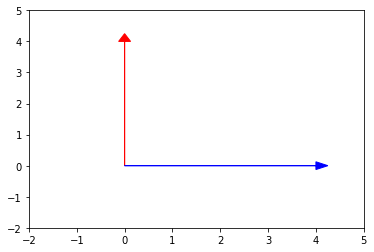

In [82]:
#Orthogonal Vectors are also known as perpendicular vectors

v1 = [0,4]
v2 = [4,0]

plt.arrow(0,0, v1[0], v1[1], head_width=.25, head_length=.25, color='r')
plt.arrow(0,0, v2[0], v2[1], head_width=.25, head_length=.25, color='b')

plt.xlim(-2, 5)
plt.ylim(-2, 5)

plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [122]:
# the dot product of two vectors can tell if they are orthogonal
# the vectors are not orthongonal because two vectors that orthogonal have a dot product of 0
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [87]:
# creating the array and taking the norm
c = np.array([2, -15, 6, 20])

normc = np.linalg.norm(c)

In [88]:
# The norm squared
normc**2

665.0

In [89]:
# the dot product of the vector of itself is the same as the norm squared
np.dot(c,c)

665

In [91]:
transpose = c.T

transpose

array([  2, -15,   6,  20])

In [94]:
transpose*c

array([  4, 225,  36, 400])

In [95]:
# sum of c.t*c is the same value as the two above
4+225+36+400

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [96]:
# we need to find the norm of each vector first 
d = np.array([7, 12])
e = np.array([2, 11, -8])

print(np.linalg.norm(d))
np.linalg.norm(e)

13.892443989449804


13.74772708486752

d and e written in linear combination of scalars and unit vectors


\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [98]:
# created the array then took the norm and divided each value by the norm
# resulting vector is the unit vector
f = np.array([4, 12, 11, 9, 2])

uvf = f/np.linalg.norm(f)

uvf

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

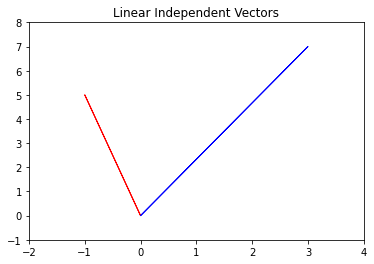

In [111]:
# linearly Independent values

#axis bounds
plt.xlim(-2, 4)
plt.ylim(-1, 8)

# indpendent vectors
vi = [-1, 5] # red line
vii = [3, 7] # blue line

# plot vectors
plt.arrow(0,0, vi[0], vi[1], color='red' )
plt.arrow(0,0, vii[0], vii[1], color='blue')

plt.title('Linear Independent Vectors')
plt.show()

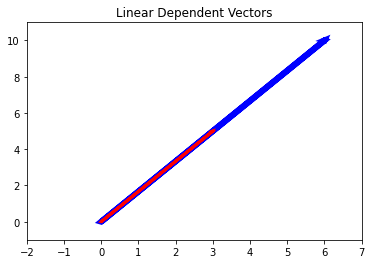

In [110]:
# linearly Dependent values

#axis bounds
plt.xlim(-2, 7)
plt.ylim(-1, 11)

# indpendent vectors
vi = [3, 5] # red line
vi2 = np.multiply(2, vi)

# plot vectors
plt.arrow(0,0, vi2[0], vi2[1], linewidth=6, color='blue')
plt.arrow(0,0, vi[0], vi[1], linewidth=3, color='red' )

plt.title('Linear Dependent Vectors')
plt.show()

#does that count as 3d? when I scaled the vector by 2 I also scaled the line width times 2? Third Dimension? Maybe? 

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [ ]:
# The span of the above vectors is 2

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
# the span of the above vectors is 3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


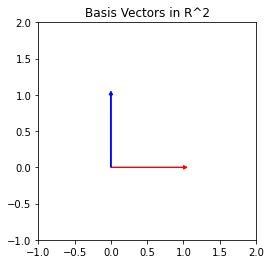

In [121]:
# Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
i_hat = [1,0]
j_hat = [0,1]

# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], head_width=.05, head_length=0.05, color ='blue')
plt.title("Basis Vectors in R^2")
plt.show()

## 6.2 What does it mean to form a basis?

A basis is a vector that is independent, that spans the vector space specified in the vector. The above vector spans the R^2 vector space. You can say the same for the the vectors I created vi and vii. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [120]:
P = np.array([[1,2,3],
              [-1,0,7], 
              [4,8,2]])

print('Rank of P matrix is', np.linalg.matrix_rank(P))

Rank of P matrix is 3


## 7.2 What does the rank of a matrix tell us?

The Rank tells us the number of non redundant vectors in a matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

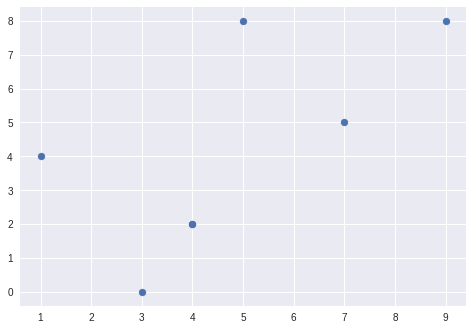

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()